In [34]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [41]:
df = pd.read_csv('Exp1.csv')

#ktore kolumhy do modelu
columns_to_use = ["ap", "vc", "feed", "Ra"]
df = df[columns_to_use].copy()

In [42]:
# zamiana typu danych w kolumnach?
for col in columns_to_use:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [43]:
# usuwanie?
df = df.dropna()

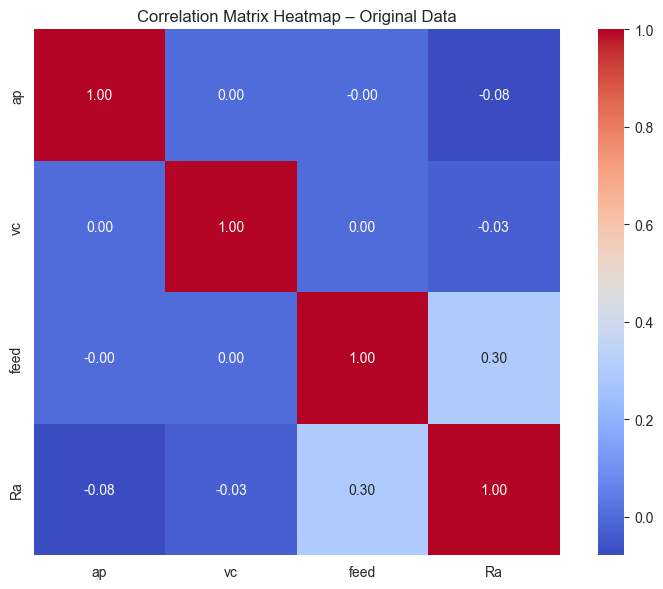

In [44]:
# correlation matrix on original (unscaled) data
corr_matrix_orig = df.corr()

# plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_orig, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap – Original Data")
plt.tight_layout()
plt.show()


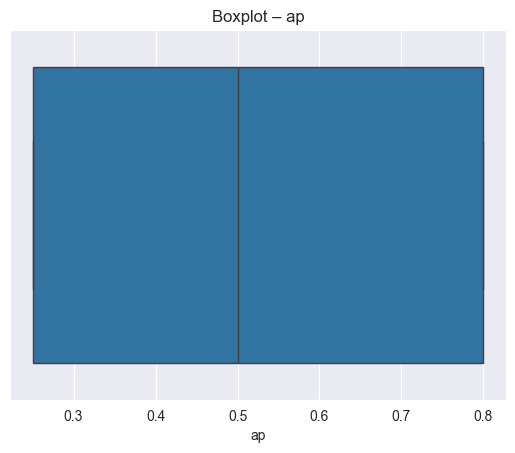

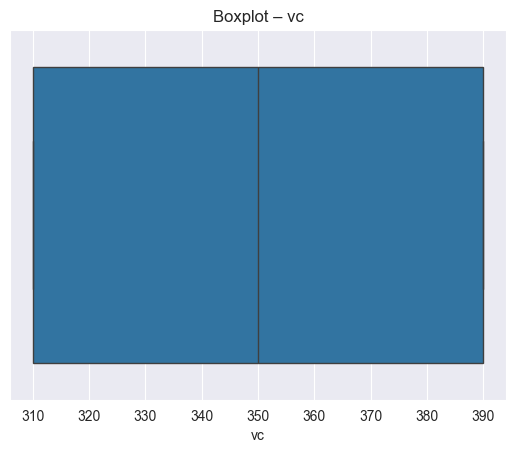

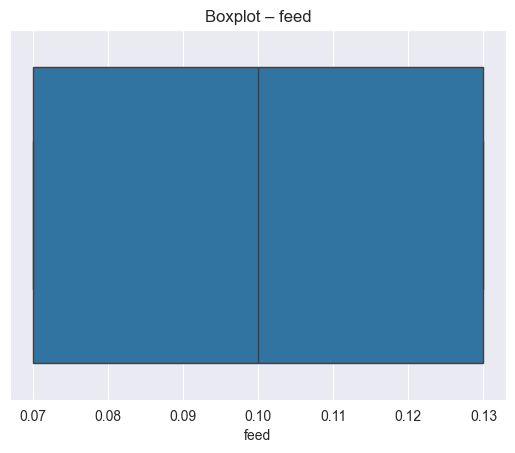

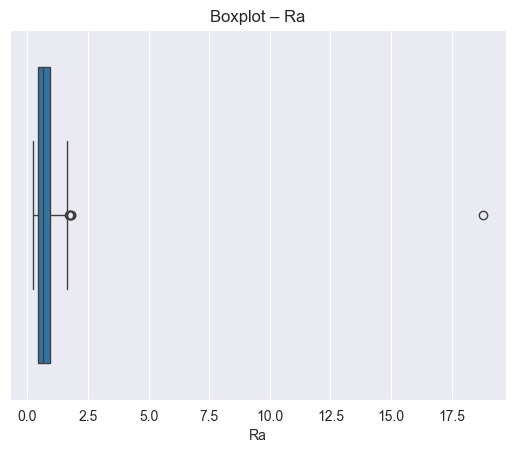

In [45]:
# wyszukiwanie outlierow
for col in ["ap", "vc", "feed", "Ra"]:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot – {col}")
    plt.show()

In [40]:
# skalowanie danych?
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["ap", "vc", "feed"]])

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required by StandardScaler.

In [ ]:
# nowy df
df_scaled = pd.DataFrame(X_scaled, columns=["ap_scaled", "vc_scaled", "feed_scaled"])
df_scaled["Ra"] = df["Ra"].values

In [ ]:
# zapis
conn = sqlite3.connect('SurfaceEXP1.db')  # dodaj rozszerzenie .db (zalecane)
df_scaled.to_sql('SurfaceEXP1', conn, if_exists='replace', index=False)
conn.close()